In [63]:
# import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk


combined_wine = pd.read_csv('combined_wine.csv')
combined_wine.head()
combined_wine.shape

(6497, 13)

In [64]:
# make a copy of the data

combined_wine_copy = combined_wine.copy() 

#create a new column called 'quality_label' and assign the value based on the 'quality' column  value
# 0-4 = 'low'   5-6 = 'medium'   7-10 = 'high'  
combined_wine_copy['quality_label'] = combined_wine_copy['quality'].apply(lambda value: 'low' if value <= 4 else 'medium' if value <= 6 else 'high')

combined_wine_copy.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type,quality_label
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,medium
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red,medium
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red,medium
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red,medium
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,medium


Droping the columns

In [65]:
# drop the 'quality' column
combined_wine_copy = combined_wine_copy.drop(columns = 'quality')

Encoding

In [66]:

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
combined_wine_copy['quality_label'] = le.fit_transform(combined_wine_copy['quality_label'])
combined_wine_copy['type'] = le.fit_transform(combined_wine_copy['type']) 
combined_wine_copy.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type,quality_label
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0,2
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0,2
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0,2
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0,2


Split the Data

In [67]:
#importing train_test_split and GridSearchCV
from sklearn.model_selection import train_test_split,GridSearchCV

X = combined_wine_copy.drop('quality_label', axis=1) #features
y = combined_wine_copy['quality_label'] #target

#splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("original:",combined_wine_copy.shape, "\nX:", X.shape, "\ny:", y.shape)

original: (6497, 13) 
X: (6497, 12) 
y: (6497,)


In [68]:
y_test.value_counts()
y_test.shape
y_train.value_counts()
y_train.shape


(5197,)

In [69]:
# # normalize data
# from sklearn.preprocessing import MinMaxScaler

# scaler = MinMaxScaler()

# X_train = scaler.fit_transform(X_train)
# X_test = scaler.fit_transform(X_test)

Building model - RandomForestClassifier

0.8576923076923076


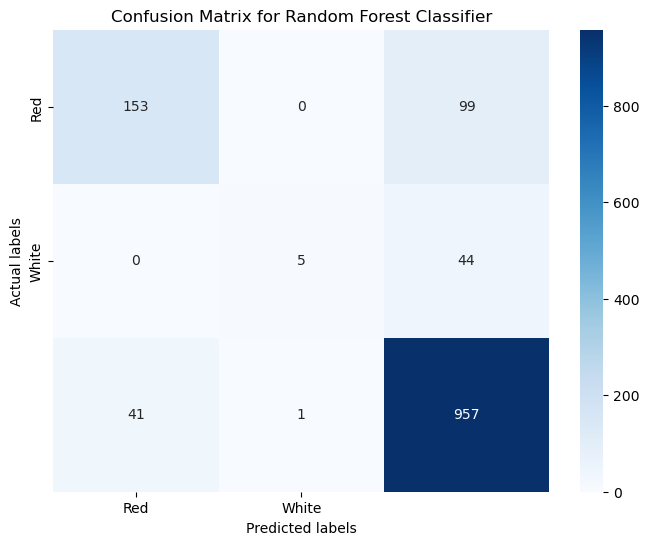

In [70]:
#importing random forest classifier
from sklearn.ensemble import RandomForestClassifier as randomforestclassifier


#initializing the model
RF_model = randomforestclassifier(random_state=42)

#fitting the model
RF_model.fit(X_train, y_train)

# Prediction
preds = RF_model.predict(X_test) #predicting
X_test
y_test

# accuracy score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix #importing necessary metrics
acc = accuracy_score(y_test, preds) #accuracy
print(acc) #accuracy

classification_report(y_test, preds) #classification report
#create a confusion matrix

conf_matrix = confusion_matrix(y_test, preds)

#create a visualization of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Red', 'White'], yticklabels=['Red', 'White'])
plt.xlabel('Predicted labels')
plt.ylabel('Actual labels')
plt.title('Confusion Matrix for Random Forest Classifier')
plt.show()

Building model - RandomForestClassifier - Model Improvement

In [71]:
import numpy as np

n_estimators = np.arange(10,210,10)
max_depth = np.arange(5, 55, 5)
min_samples_split = np.arange(2, 15, 2)
max_features = ["sqrt", "log2", None]

param_grid = {
  'n_estimators': n_estimators,
  'max_depth': max_depth,
  'min_samples_split': min_samples_split,
  'max_features': max_features,
}

param_grid

{'n_estimators': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130,
        140, 150, 160, 170, 180, 190, 200]),
 'max_depth': array([ 5, 10, 15, 20, 25, 30, 35, 40, 45, 50]),
 'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14]),
 'max_features': ['sqrt', 'log2', None]}

In [72]:
#importing random forest classifier
from sklearn.ensemble import RandomForestClassifier as randomforestclassifier
from sklearn.model_selection import RandomizedSearchCV

#initializing the model
RF_model = randomforestclassifier(random_state=42)

#initializing the RandomizedSearchCV
RS_grid = RandomizedSearchCV(estimator=RF_model, param_distributions=param_grid, n_iter=15)
RS_grid

#fitting the model
RS_grid.fit(X_train, y_train)

preds = RS_grid.predict(X_test) #predicting
X_test
y_test

print(
'best score: ', RS_grid.best_score_,
'\nparams: ', RS_grid.best_params_
)

best score:  0.8439509143407122 
params:  {'n_estimators': np.int64(120), 'min_samples_split': np.int64(2), 'max_features': 'sqrt', 'max_depth': np.int64(50)}


In [73]:
grid_results = pd.concat([
  pd.DataFrame(RS_grid.cv_results_["params"]),
  pd.DataFrame(RS_grid.cv_results_["mean_test_score"], columns=["Accuracy"])
], axis=1)

grid_results

,n_estimators,min_samples_split,max_features,max_depth,Accuracy
0,140,6,log2,45,0.838949
1,100,4,sqrt,15,0.838564
2,110,10,None,45,0.833946
3,130,8,log2,45,0.836831
4,20,4,None,25,0.825478
5,20,4,sqrt,30,0.836256
6,40,14,sqrt,20,0.828557
7,80,14,None,25,0.828749
8,150,10,sqrt,45,0.832982
9,120,2,sqrt,50,0.843951
